### Практическая работа к уроку №8

#### 1. Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.

Да, но следует помнить, что PCA не выбирает из имеющихся признаков наиболее значимые, а строит новые, которые «учтут максимум информации» из имеющихся признаков, создав тем самым новое уменьшенное признаковое пространство.

#### 2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [2]:
def normalize(data):
    X_ = data.astype(float)

    rows, cols = X_.shape

    means = X_.mean(0)
    for i in range(rows):
        for j in range(cols):
            X_[i, j] -= means[j]

    std = np.std(X_, axis=0)
    for i in range(cols):
        for j in range(rows):
            X_[j][i] /= std[i]
    return X_

In [3]:
def my_pca(data, n_components):   
    u, d, v = np.linalg.svd(data)
    if not (0 < n_components <= len(v)):
        raise ValueError('n_components should be between 0 and number of features')
    W = v.T[:, :n_components]
    
    return data @ W

In [4]:
X, y = load_iris(return_X_y=True)

X = normalize(X)
Z = my_pca(X, 2)

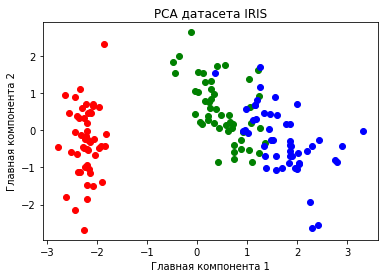

In [5]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

#### 3. Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [6]:
# Сравнивать качество будем с помощью accuracy
def accuracy(pred, y):
    return np.mean(pred == y)

In [7]:
X, y = load_iris(return_X_y=True)

In [8]:
# Данные до PCA

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=23
)

In [9]:
# Данные после PCA
# Нормализация и снижение размерности до 2 признаков

X = normalize(X)
Z = my_pca(X, 2)

X_train_, X_test_, y_train_, y_test_ = model_selection.train_test_split(
    Z, y, test_size=0.3, random_state=23
)

#### Случайный лес

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(min_samples_leaf=5,
                            random_state=23)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy before PCA: {accuracy(y_pred, y_test)}")

accuracy before PCA: 0.9777777777777777


In [12]:
clf = RandomForestClassifier(min_samples_leaf=5,
                            random_state=23)
clf.fit(X_train_, y_train_)
y_pred_ = clf.predict(X_test_)
print(f"accuracy after PCA: {accuracy(y_pred_, y_test_)}")

accuracy after PCA: 0.9333333333333333


#### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(f"accuracy before PCA: {accuracy(y_pred, y_test)}")

accuracy before PCA: 1.0


In [15]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_, y_train_)
y_pred_ = neigh.predict(X_test_)
print(f"accuracy after PCA: {accuracy(y_pred_, y_test_)}")

accuracy after PCA: 0.9777777777777777


#### **Вывод**: После уменьшения количества признаков в датасете с 4 до 2 мы безусловно потеряли в качестве на тестовой выборке. Но разница крайне мала. После PCA на модели случайного леса отставание в 4%, а на модели KNN 2%. Если настроить гиперпараметры, то скорей всего на таком простом датасете можно достичь такого же хорошего качества, что и до PCA.